In [1]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn
from models.logreg import LogisticRegression
from utilities import *
df = pd.read_csv("datasets/rollouts.csv")

In [3]:
# Encode the dataset
from encoding import advantage
chess_df = easy_encode(df, advantage)
chess_df.rename(columns = {0: "Moves", 1: "Pieces"}, inplace=True)
chess_df.head(10)

100%|██████████| 100000/100000 [00:21<00:00, 4636.09it/s]


,Moves,Pieces,Winner
0,-1,0,0
1,-3,0,0
2,-1,0,0
3,-8,0,0
4,0,0,0
5,-3,0,0
6,4,0,0
7,-2,0,0
8,-5,0,0
9,-2,0,0


(-68.85, 59.85)

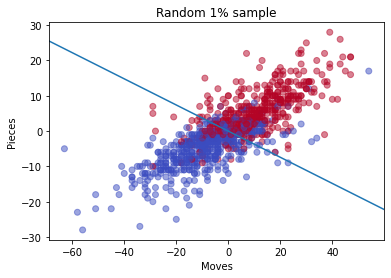

In [4]:
sample = chess_df.sample(frac=0.01)
Theta = LogisticRegression(np.array(chess_df[["Moves", "Pieces"]]), valign(np.array(chess_df["Winner"]))).theta

plt.scatter(sample["Moves"], sample["Pieces"], c=sample["Winner"], cmap="coolwarm", alpha=0.5)
plt.title("Random 1% sample")
plt.xlabel("Moves")
plt.ylabel("Pieces")
pl_min, pl_max = plt.xlim()
pl = np.linspace(pl_min, pl_max, 1000)
plt.plot(pl, -(Theta[0] + Theta[1] * pl))
plt.xlim(pl_min, pl_max)

(-69.55, 74.55)

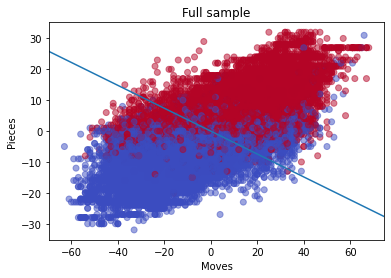

In [5]:
sample = chess_df.sample(frac=1)
Theta = LogisticRegression(np.array(chess_df[["Moves", "Pieces"]]), valign(np.array(chess_df["Winner"]))).theta

plt.scatter(sample["Moves"], sample["Pieces"], c=sample["Winner"], cmap="coolwarm", alpha=0.5)
plt.title("Full sample")
plt.xlabel("Moves")
plt.ylabel("Pieces")
pl_min, pl_max = plt.xlim()
pl = np.linspace(pl_min, pl_max, 1000)
plt.plot(pl, -(Theta[0] + Theta[1] * pl))
plt.xlim(pl_min, pl_max)


In [10]:
train_df, test_df = sklearn.model_selection.train_test_split(chess_df, test_size=0.1)

trainX, trainY = XYsplit(train_df, "Winner")
testX, testY = XYsplit(test_df, "Winner")
logreg = LogisticRegression(trainX, trainY)
logreg.error(testX, testY)


0.1681